# Imports for preprocessing

In [ ]:
import pandas as pd
import numpy as np

# Imports for dealing with missing values

In [ ]:
import missingno as msno
from sklearn.impute import SimpleImputer as SI

# Imports for visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

# Reading Summary and Statistics

Reading the csv file



In [ ]:
data = pd.read_csv('credit_risk_customer_data.csv')

Using `.describe`, `.info`, `.head`, `.tail` to have a glimpse of the dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,1125.0,2.000000e-01,4.001779e-01,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00
id,1125.0,5.783677e+07,1.817150e+06,54982353.0,54990497.0,5.898975e+07,5.899799e+07,5.900624e+07
fea_1,1125.0,5.482667e+00,1.383338e+00,1.0,4.0,5.000000e+00,7.000000e+00,7.000000e+00
fea_2,976.0,1.283911e+03,5.176402e+01,1116.5,1244.0,1.281500e+03,1.314500e+03,1.481000e+03
fea_3,1125.0,2.333333e+00,8.787730e-01,1.0,1.0,3.000000e+00,3.000000e+00,3.000000e+00
fea_4,1125.0,1.208836e+05,8.844523e+04,15000.0,72000.0,1.020000e+05,1.390000e+05,1.200000e+06
fea_5,1125.0,1.928889e+00,2.571247e-01,1.0,2.0,2.000000e+00,2.000000e+00,2.000000e+00
fea_6,1125.0,1.087200e+01,2.676437e+00,3.0,8.0,1.100000e+01,1.100000e+01,1.600000e+01
fea_7,1125.0,4.832889e+00,2.971182e+00,-1.0,5.0,5.000000e+00,5.000000e+00,1.000000e+01
fea_8,1125.0,1.008027e+02,1.198896e+01,64.0,90.0,1.050000e+02,1.110000e+02,1.150000e+02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [ ]:
data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [ ]:
data.tail()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000
1124,0,54989781,4,1415.0,3,93000.0,2,8,5,113,4,151300,273.861279


# Showing Columns with Missing Values

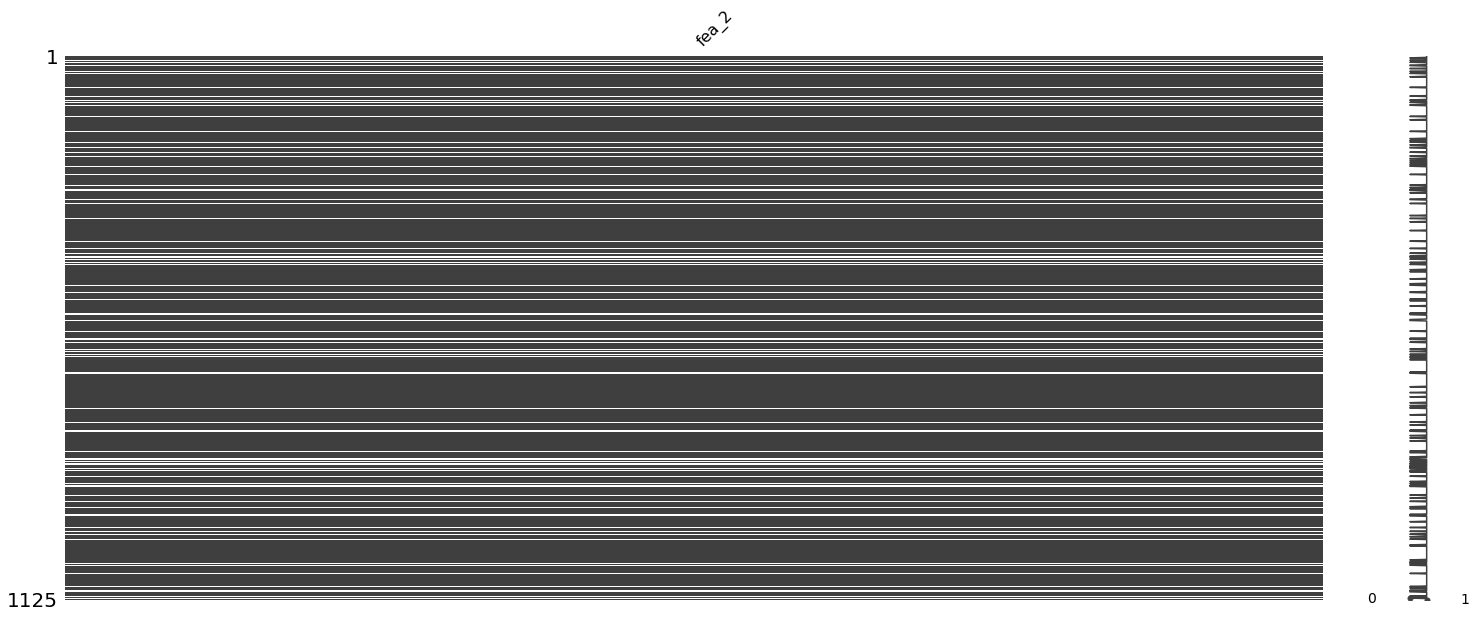

<Figure size 216x216 with 0 Axes>

In [ ]:
mask = data.isnull()
columns_wmiss = data.columns[mask.any()].tolist()
msno.matrix(data[columns_wmiss])
plt.figure(figsize=(3, 3))
plt.show()

Only the feature `fea_2` has missing values.

# Filling the Missing Values

In [ ]:
features_wmiss = ['fea_2']
imp = SI(missing_values=np.nan, strategy='constant', fill_value=0)
data[features_wmiss] = imp.fit_transform(data[features_wmiss])
data[features_wmiss].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fea_2   1125 non-null   float64
dtypes: float64(1)
memory usage: 8.9 KB


The `imp = SI(missing_values=np.nan, strategy='constant', fill_value=0)` was used because maybe the feature is not applicable on that particular id/user or he/she does not have any.

Now, the `fea_2` features doesn't have any missing values.

# Downloading Cleaned Dataset

In [ ]:
data.to_csv('cleaned_credit_risk_customer_data.csv')